In [27]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import scipy as scipy
import statsmodels
from sklearn.datasets import load_digits


#1 - Dataset Iris

In [7]:
df_iris = pd.read_csv('iris.csv')

##Questão A
Faça uma análise inicial sobre esse dataset

In [8]:
df_iris.head()

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [10]:
df_iris.describe()

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [11]:
df_iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal_Length  150 non-null    float64
 1   Sepal_Width   150 non-null    float64
 2   Petal_Length  150 non-null    float64
 3   Petal_Width   150 non-null    float64
 4   Species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


##Questão B
Use o boxplot e o histograma para caracterizar as propriedades de cada uma das espécies existentes.

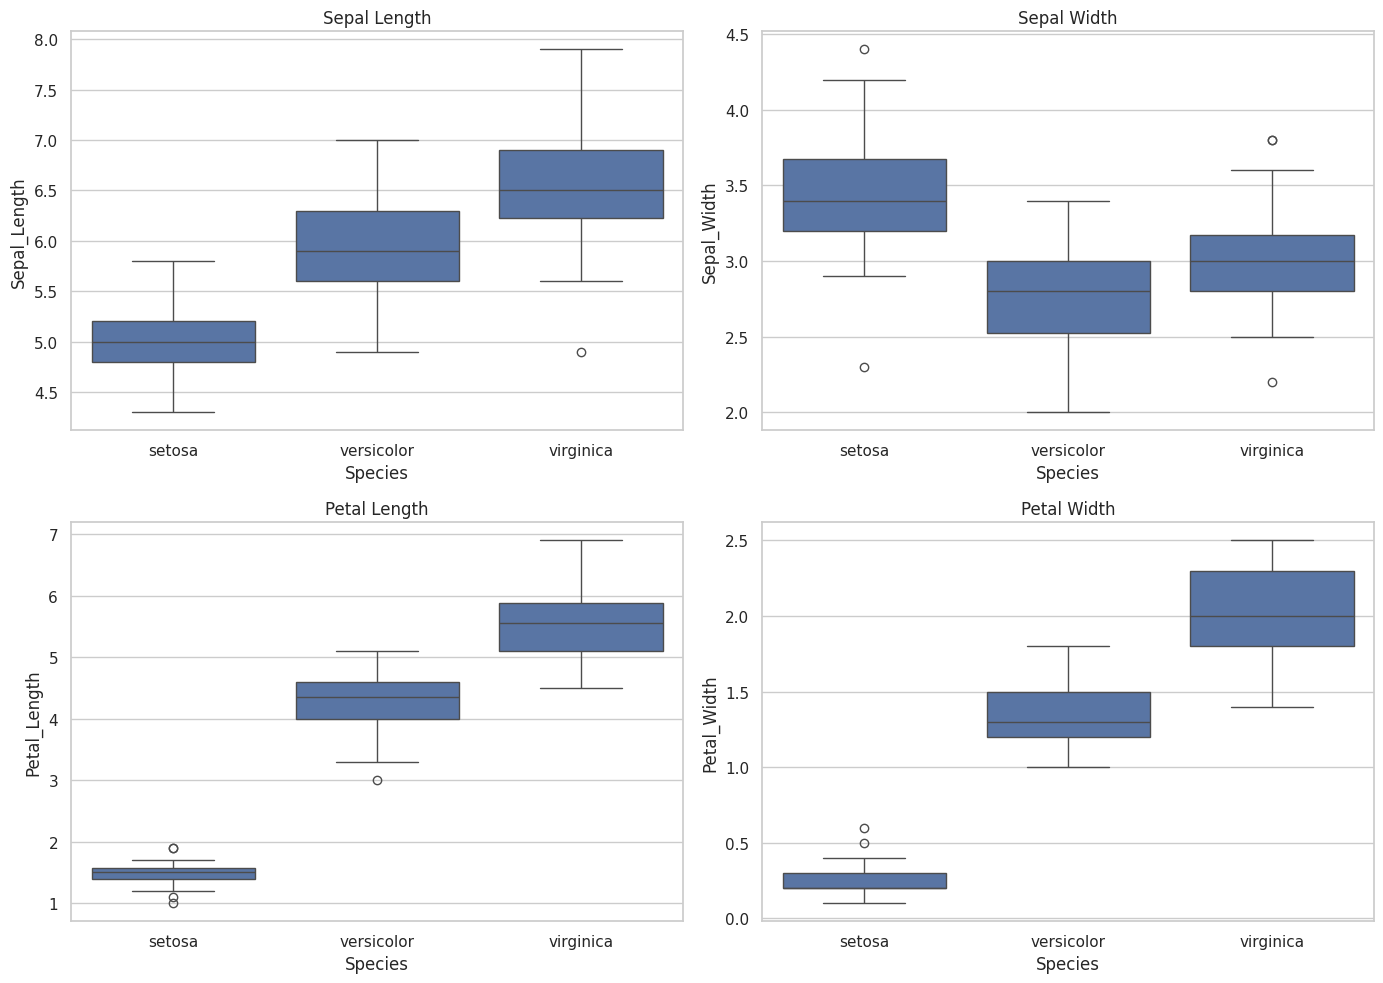

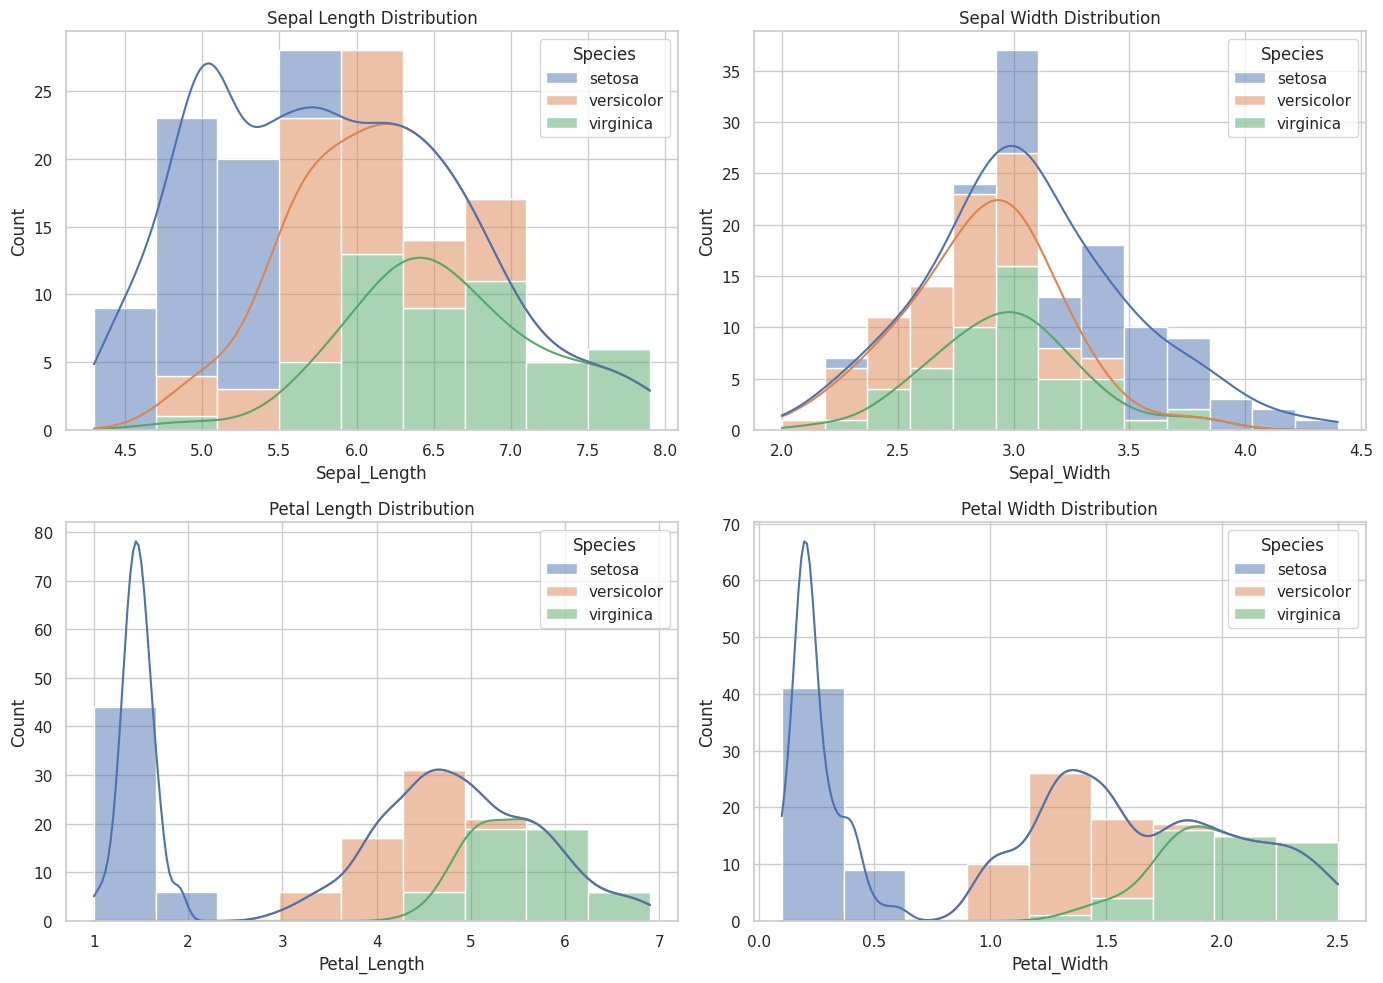

In [13]:
sns.set(style="whitegrid")

fig, axs = plt.subplots(2, 2, figsize=(14, 10))
sns.boxplot(x="Species", y="Sepal_Length", data=df_iris, ax=axs[0, 0])
sns.boxplot(x="Species", y="Sepal_Width", data=df_iris, ax=axs[0, 1])
sns.boxplot(x="Species", y="Petal_Length", data=df_iris, ax=axs[1, 0])
sns.boxplot(x="Species", y="Petal_Width", data=df_iris, ax=axs[1, 1])
axs[0, 0].set_title('Sepal Length')
axs[0, 1].set_title('Sepal Width')
axs[1, 0].set_title('Petal Length')
axs[1, 1].set_title('Petal Width')
plt.tight_layout()
plt.show()

fig, axs = plt.subplots(2, 2, figsize=(14, 10))
sns.histplot(data=df_iris, x="Sepal_Length", hue="Species", multiple="stack", ax=axs[0, 0], kde=True)
sns.histplot(data=df_iris, x="Sepal_Width", hue="Species", multiple="stack", ax=axs[0, 1], kde=True)
sns.histplot(data=df_iris, x="Petal_Length", hue="Species", multiple="stack", ax=axs[1, 0], kde=True)
sns.histplot(data=df_iris, x="Petal_Width", hue="Species", multiple="stack", ax=axs[1, 1], kde=True)
axs[0, 0].set_title('Sepal Length Distribution')
axs[0, 1].set_title('Sepal Width Distribution')
axs[1, 0].set_title('Petal Length Distribution')
axs[1, 1].set_title('Petal Width Distribution')
plt.tight_layout()
plt.show()

##Questão C
Somente olhando esses gráficos, é possível afirmar que uma ou mais propriedades (Sepal_Length, Sepal_Width, Petal_Length, Petal_Width) são suficientes para distinguir as espécies?

**R: ** Sim, analisando os gráficos que plotamos acima é possível afirmar que uma ou mais características já são suficientes para distinguir as espécies

##Questão D
Aplique a regressão logística para avaliar o modelo de classificação.

In [16]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_curve, auc, log_loss
from sklearn.linear_model import LogisticRegression

In [18]:
X = df_iris.drop(columns="Species")
y = df_iris["Species"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

model = LogisticRegression(max_iter=200, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

##Questão E
Calcule a acurácia, precisão e recall

In [19]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')

accuracy, precision, recall

(0.9333333333333333, 0.9345238095238095, 0.9333333333333333)

##Questão F
Plote a matriz de confusão com matplotlib ou seaborn.


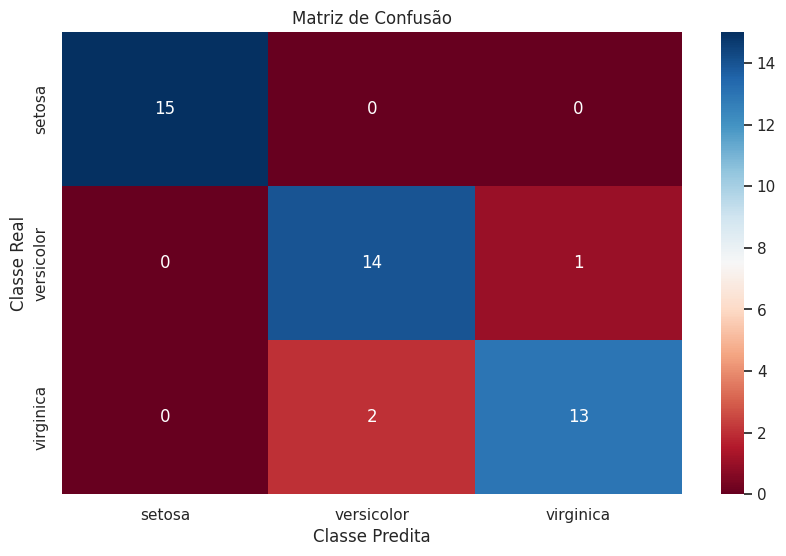

In [20]:
conf_matrix = confusion_matrix(y_test, y_pred, labels=model.classes_)

plt.figure(figsize=(10, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="RdBu", xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel("Classe Predita")
plt.ylabel("Classe Real")
plt.title("Matriz de Confusão")
plt.show()

#2 - Dataset load_digits

In [22]:
from sklearn.datasets import load_digits
digits = load_digits()

In [24]:
df_digits=pd.DataFrame(digits.data,columns=digits.feature_names)
df_digits.head(10)

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0
5,0.0,0.0,12.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.0,0.0,0.0,0.0,9.0,16.0,16.0,10.0,0.0,0.0
6,0.0,0.0,0.0,12.0,13.0,0.0,0.0,0.0,0.0,0.0,...,8.0,0.0,0.0,0.0,1.0,9.0,15.0,11.0,3.0,0.0
7,0.0,0.0,7.0,8.0,13.0,16.0,15.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,13.0,5.0,0.0,0.0,0.0,0.0
8,0.0,0.0,9.0,14.0,8.0,1.0,0.0,0.0,0.0,0.0,...,8.0,0.0,0.0,0.0,11.0,16.0,15.0,11.0,1.0,0.0
9,0.0,0.0,11.0,12.0,0.0,0.0,0.0,0.0,0.0,2.0,...,4.0,0.0,0.0,0.0,9.0,12.0,13.0,3.0,0.0,0.0


##Questão A
Faça uma análise inicial sobre esse
dataset

I. Quantos dados possui?

II. Existem dados nulos? Se sim quantos?

III. Todos são dados numéricos ou existem colunas com dados
categóricos?

In [29]:
#Quantidade de dados
digit_counts = pd.Series(digits.target).value_counts()
total_count = digit_counts.sum()

print(total_count)

1797


In [31]:
#Dados nulos
dados_nulos = df_digits.isnull().sum().values
dados_nulos.shape[0]

64

In [32]:
#Análise de tipos das colunas
categoricos = df_digits.select_dtypes(include=['object', 'category']).columns
numericos = df_digits.select_dtypes(include=['int64', 'float64']).columns

print("Colunas categóricas:", categoricos)
print("Colunas numéricas:", numericos)

Colunas categóricas: Index([], dtype='object')
Colunas numéricas: Index(['pixel_0_0', 'pixel_0_1', 'pixel_0_2', 'pixel_0_3', 'pixel_0_4',
       'pixel_0_5', 'pixel_0_6', 'pixel_0_7', 'pixel_1_0', 'pixel_1_1',
       'pixel_1_2', 'pixel_1_3', 'pixel_1_4', 'pixel_1_5', 'pixel_1_6',
       'pixel_1_7', 'pixel_2_0', 'pixel_2_1', 'pixel_2_2', 'pixel_2_3',
       'pixel_2_4', 'pixel_2_5', 'pixel_2_6', 'pixel_2_7', 'pixel_3_0',
       'pixel_3_1', 'pixel_3_2', 'pixel_3_3', 'pixel_3_4', 'pixel_3_5',
       'pixel_3_6', 'pixel_3_7', 'pixel_4_0', 'pixel_4_1', 'pixel_4_2',
       'pixel_4_3', 'pixel_4_4', 'pixel_4_5', 'pixel_4_6', 'pixel_4_7',
       'pixel_5_0', 'pixel_5_1', 'pixel_5_2', 'pixel_5_3', 'pixel_5_4',
       'pixel_5_5', 'pixel_5_6', 'pixel_5_7', 'pixel_6_0', 'pixel_6_1',
       'pixel_6_2', 'pixel_6_3', 'pixel_6_4', 'pixel_6_5', 'pixel_6_6',
       'pixel_6_7', 'pixel_7_0', 'pixel_7_1', 'pixel_7_2', 'pixel_7_3',
       'pixel_7_4', 'pixel_7_5', 'pixel_7_6', 'pixel_7_7'],
      dtyp

##Questão B
Aplique a regressão logística para construir e avaliar o modelo de
classificação.


In [40]:
X = digits.data
y = digits.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

df_X_train = pd.DataFrame(X_train, columns=digits.feature_names)
df_X_test = pd.DataFrame(X_test, columns=digits.feature_names)
df_y_train = pd.DataFrame(y_train, columns=['target'])
df_y_test = pd.DataFrame(y_test, columns=['target'])

logreg = LogisticRegression()
logreg.fit(X_train, y_train)

y_pred = logreg.predict(df_X_test)
y_pred_proba = logreg.predict_proba(df_X_test)[:, 1]

df_X_test["Previsao_Modelo"] = y_pred
df_X_test["Probabilidade_target"] = y_pred_proba

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


##Questão C
Calcule a acurácia, precisão e recall com base no desempenho do modelo.

In [45]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')

accuracy, precision, recall

ValueError: Found input variables with inconsistent numbers of samples: [10000, 360]

##Questão D
Plote a matriz de confusão dos resultados do modelo utilizando matplotlib
ou seaborn.


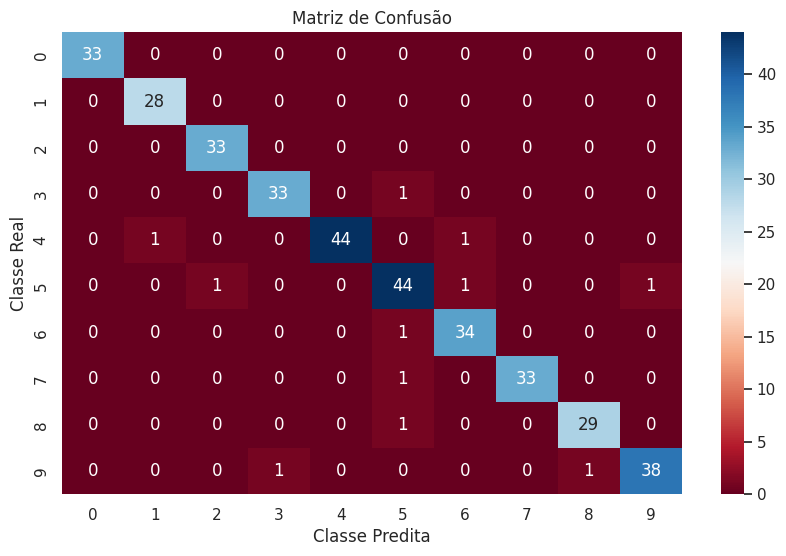

In [42]:
conf_dig = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10, 6))
sns.heatmap(conf_dig, annot=True, fmt="d", cmap="RdBu", xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel("Classe Predita")
plt.ylabel("Classe Real")
plt.title("Matriz de Confusão")
plt.show()

##Questão E
Aplique a regressão logística para avaliar o modelo de classificação dos
dígitos de 0 a 9 utilizando o conjunto de dados específico para esse problema
(por exemplo, MNIST).

In [43]:
import tensorflow as tf
from sklearn.preprocessing import StandardScaler

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [47]:
X = pd.DataFrame(x_train.reshape(-1, 28*28))
y = pd.DataFrame(y_train, columns = ['label'])

X_train_split, X_val, y_train_split, y_val = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_split)
X_val_scaled = scaler.transform(X_val)

model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train_split.values.ravel())

y_val_pred = model.predict(X_val_scaled)
y_val_pred_proba= model.predict_proba(X_val_scaled)[:,1]

y_result = y.copy()
y_result['Previsão'] = pd.DataFrame(y_val_pred)
y_result['Probabildade da Previsão'] = pd.DataFrame(y_val_pred_proba)

y_result.iloc[7:15]


,label,Previsão,Probabildade da Previsão
7,3,7.0,1.830579e-13
8,1,5.0,3.811942e-11
9,4,4.0,3.668609e-14
10,3,2.0,3.638673e-09
11,5,5.0,1.237231e-12
12,3,6.0,4.003479e-12
13,6,8.0,1.097028e-06
14,1,1.0,9.976291e-01


##Questão F
Calcule a acurácia, precisão e recall com base no desempenho do modelo
para a classificação dos dígitos de 0 a 9.

In [48]:
accuracy = accuracy_score(y_val, y_val_pred)
precision = precision_score(y_val, y_val_pred, average='weighted')
recall = recall_score(y_val, y_val_pred, average='weighted')

accuracy, precision, recall

(0.9105, 0.9103475361185632, 0.9105)

##Questão G
Plote a matriz de confusão dos resultados da classificação dos dígitos de 0
a 9 utilizando matplotlib ou seaborn.

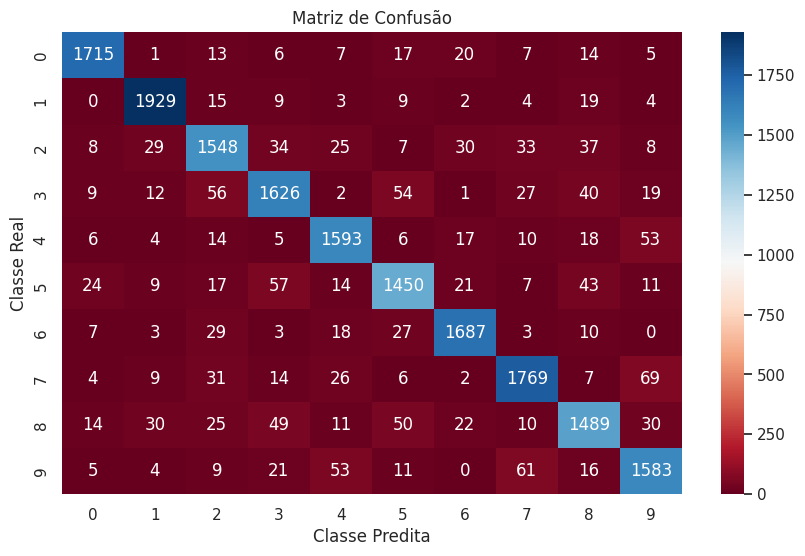

In [49]:
conf_n = confusion_matrix(y_val, y_val_pred)

plt.figure(figsize=(10, 6))
sns.heatmap(conf_n, annot=True, fmt="d", cmap="RdBu", xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel("Classe Predita")
plt.ylabel("Classe Real")
plt.title("Matriz de Confusão")
plt.show()